# Deep Learning (TensorFlow-Keras) Neural Network API

![Keras](https://deeplizard.com/assets/png/3c5c3128.png)

Keras was created by [François Chollet](https://twitter.com/fchollet)

In older usage of Keras with tensorflow backend:
```
from keras.layers import Dense
```
But in Keras integrated with TensorFlow:
```
from tensorflow.keras.layers import Dense
```

Keras run on a single GPU without requiring any explicit  code configuration.

In [12]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [13]:
import tensorflow as tf
print("Num CPUs Available: ", len(tf.config.experimental.list_physical_devices('CPU')))
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Num TPUs Available: ", len(tf.config.experimental.list_physical_devices('TPU')))

Num CPUs Available:  1
Num GPUs Available:  1
Num TPUs Available:  0


```set_memory_growth()``` attempts to allocate only as much GPU memory as needed at a given time, and continues to allocate more when needed.

In [15]:
# tf.config.experimental.set_memory_growth(tf.config.experimental.list_physical_devices('GPU')[0], True)

Keras have some dataset, e.g.:

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

3


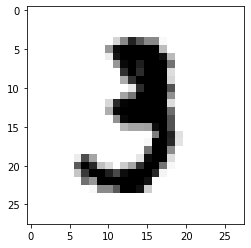

In [5]:
import matplotlib.pyplot as plt

print(y_train[10])
plt.imshow(x_train[10],cmap=plt.cm.binary)
plt.show()

3


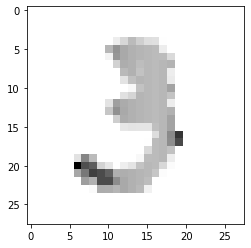

In [6]:
# rescaling data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

print(y_train[10])
plt.imshow(x_train[10],cmap=plt.cm.binary)
plt.show()

There exist two types of models in Keras API:
* **Sequential**: a list of layers
* **Functional**: need to specify input in each layers.

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

You can see that the model in Sequential.

In [8]:
print(type(model))

<class 'keras.engine.sequential.Sequential'>


We'll be using ```sparse_categorical_crossentropy```, given that our labels are in integer format. When we have  only one output, rather than two, we use ```binary_crossentropy ```

The model get data during training with ```fit()```.  x must be:
* A Numpy array, or a list of arrays.
* A TensorFlow tensor, or a list of tensors.
* A dict mapping input names to the corresponding array/tensors.
* A tf.data dataset. Should return a tuple of either ```(inputs, targets)``` or ```(inputs, targets, sample_weights)```.
* A generator or ```keras.utils.Sequence``` returning ```(inputs, targets)``` or  ```(inputs, targets, sample_weights)```.



There are two ways to create a **Validation set** inside ```fit()``` function:
* ```validation_data = (x_val, y_val)``` 
* ```validation_split=0.1``` (10% of training set)

The ```fit()``` function shuffles the data before each epoch by default.
 When specifying the ```validation_split``` parameter, however, the validation data is selected from the last samples in the x and y data before shuffling.

 Therefore, in the case we're using ```validation_split``` in this way to create our validation data, **we need to be sure that our data has been shuffled ahead of time**.

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 11s 3ms/step - loss: 0.2635 - accuracy: 0.9237
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1091 - accuracy: 0.9664
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0745 - accuracy: 0.9766


In [10]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

In [11]:
hist = model.fit(x_train, y_train,
                 validation_split=0.1,
                 epochs=3)

Epoch 1/3
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0560 - accuracy: 0.9825 - val_loss: 0.0592 - val_accuracy: 0.9800
Epoch 2/3
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0426 - accuracy: 0.9861 - val_loss: 0.0519 - val_accuracy: 0.9827
Epoch 3/3
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0324 - accuracy: 0.9893 - val_loss: 0.0574 - val_accuracy: 0.9828


accuracy is mean accuracy during each epochs and at the end of each epoch val_accuracy is calculated.

In [12]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [13]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0923 - accuracy: 0.9724
0.09229131788015366
0.9724000096321106


Notice, before giving data to network we do not have a **model** w just have an algorithm.

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [15]:
predictions = model.predict(x_test)
print(predictions[:5])

[[1.23279644e-08 1.16147643e-08 1.72493309e-08 7.63110529e-06
  4.69439331e-12 2.24407259e-07 6.47384529e-16 9.99992013e-01
  6.60887389e-09 6.76822225e-08]
 [3.52637988e-11 8.81852520e-06 9.99991179e-01 1.09122111e-09
  1.95437069e-10 5.53569635e-10 1.60732172e-09 1.16309636e-11
  3.77101865e-12 6.05483037e-15]
 [3.07963575e-08 9.99931812e-01 9.87422823e-07 6.05295036e-10
  4.05876290e-06 4.31302766e-07 3.84930136e-05 1.09422125e-07
  2.41079160e-05 7.17952453e-09]
 [9.99988317e-01 2.51845078e-09 1.53748465e-06 4.89214429e-08
  2.64194313e-07 2.04443666e-07 7.25993505e-06 1.34780734e-07
  1.95699670e-08 2.19674007e-06]
 [9.14929785e-08 1.44874974e-07 3.09025927e-05 3.86565262e-06
  9.99302983e-01 1.78309012e-04 1.59379688e-05 8.98679809e-06
  1.40774660e-04 3.17951461e-04]]


7


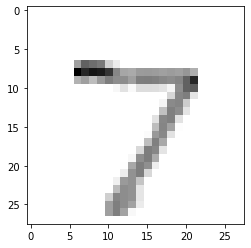

In [16]:
import numpy as np
import matplotlib.pyplot as plt

print(np.argmax(predictions[0]))
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

# Save and Load a Model 
* Saving And Loading The Model In Its Entirety (the architecture, the weights, the optimizer, the state of the optimizer, the learning rate, the loss, etc.)
```
model.save('models/trained_model.h5')
```
```
from tensorflow.keras.models import load_model
new_model = load_model('models/trained_model.h5')
```
Now you can use```new_model.get_weights()```، ```model.optimizer``` and ... . You can train a few epoches, save it then load the next day and train it.
* Saving And Loading Only The Architecture Of The Model
```
json_string = model.to_json()
```
Now you can open and write it to use it later. and
```
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)
```
* Saving And Loading The Weights Of The Model
```
model.save_weights('models/weights.h5')
```
You need to have the same architecture as the old model before loading the weights on it. So build a new model then
```
model2.load_weights('models/weights.h5')
```

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

# Preparing dataset
First, we need a dataset. Let's grab [the Dogs vs Cats dataset](https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765) from Microsoft.

In [17]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2022-07-21 08:33:46--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.220.124.107, 2600:1408:10:1a5::e59, 2600:1408:10:1a4::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.220.124.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  81.5MB/s    in 9.9s    

2022-07-21 08:33:57 (79.3 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [18]:
os.listdir()

['.config', 'kagglecatsanddogs_5340.zip', 'sample_data']

In [19]:
!unzip kagglecatsanddogs_5340.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/PetImages/Dog/5500.jpg  
  inflating: dataset/PetImages/Dog/5501.jpg  
  inflating: dataset/PetImages/Dog/5502.jpg  
  inflating: dataset/PetImages/Dog/5503.jpg  
  inflating: dataset/PetImages/Dog/5504.jpg  
  inflating: dataset/PetImages/Dog/5505.jpg  
  inflating: dataset/PetImages/Dog/5506.jpg  
  inflating: dataset/PetImages/Dog/5507.jpg  
  inflating: dataset/PetImages/Dog/5508.jpg  
  inflating: dataset/PetImages/Dog/5509.jpg  
  inflating: dataset/PetImages/Dog/551.jpg  
  inflating: dataset/PetImages/Dog/5510.jpg  
  inflating: dataset/PetImages/Dog/5511.jpg  
  inflating: dataset/PetImages/Dog/5512.jpg  
  inflating: dataset/PetImages/Dog/5513.jpg  
  inflating: dataset/PetImages/Dog/5514.jpg  
  inflating: dataset/PetImages/Dog/5515.jpg  
  inflating: dataset/PetImages/Dog/5516.jpg  
  inflating: dataset/PetImages/Dog/5517.jpg  
  inflating: dataset/PetImages/Dog/5518.jpg  
  inflating: dataset/PetImages

In [20]:
os.chdir('/content/dataset/PetImages/')
os.getcwd()

'/content/dataset/PetImages'

In [21]:
print(len(os.listdir('/content/dataset/PetImages/Cat')),len(os.listdir('/content/dataset/PetImages/Cat')))
os.listdir('/content/dataset/PetImages/Cat')[0]

12501 12501


'11853.jpg'

In [22]:
path = '/content/dataset/PetImages/' 
for pet in ["Cat", "Dog"]:
  files = os.listdir(path+pet)
  for i in range(len(files)):
    os.rename(path+pet+'/'+files[i], path+pet+"/"+pet+files[i])
  print(" ")

In [23]:
os.listdir('/content/dataset/PetImages/Cat')[:5]

['Cat7482.jpg', 'Cat1094.jpg', 'Cat7702.jpg', 'Cat9077.jpg', 'Cat2987.jpg']

In [24]:
os.getcwd()

'/content/dataset/PetImages'

In [25]:
path = '/content/dataset/PetImages/' # change if you use other places
if os.path.isdir(path+'train/dog') is False:
    os.makedirs(path+'train/dog')
    os.makedirs(path+'train/cat')
    os.makedirs(path+'valid/dog')
    os.makedirs(path+'valid/cat')
    os.makedirs(path+'test/dog')
    os.makedirs(path+'test/cat')

    os.chdir(path+'/Cat')
    for i in random.sample(glob.glob('Cat*'), 500):
        shutil.move(i, path+'train/cat')  
    os.chdir(path+'/Dog')    
    for i in random.sample(glob.glob('Dog*'), 500):
        shutil.move(i, path+'/train/dog')
    os.chdir(path+'/Cat')
    for i in random.sample(glob.glob('Cat*'), 100):
        shutil.move(i, path+'valid/cat')        
    os.chdir(path+'/Dog')
    for i in random.sample(glob.glob('Dog*'), 100):
        shutil.move(i, path+'valid/dog')
    os.chdir(path+'/Cat')
    for i in random.sample(glob.glob('Cat*'), 50):
        shutil.move(i, path+'test/cat')      
    os.chdir(path+'/Dog')
    for i in random.sample(glob.glob('Dog*'), 50):
        shutil.move(i, path+'test/dog')

In [26]:
train_path = path+'train'
valid_path = path+'valid'
test_path = path+'test'

In [27]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


```ImageDataGenerator.flow_from_directory()``` creates a DirectoryIterator, which generates batches of normalized tensor image data from the respective data directories.

We also specify ```shuffle=False``` only for test_batches.

Note, in the case where you do not know the labels for the test data, you will need to modify the test_batches variable. Specifically, the change will be to set the parameters classes = None and class_mode = None in flow_from_directory()

In [31]:
imgs, labels = next(train_batches)

In [38]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

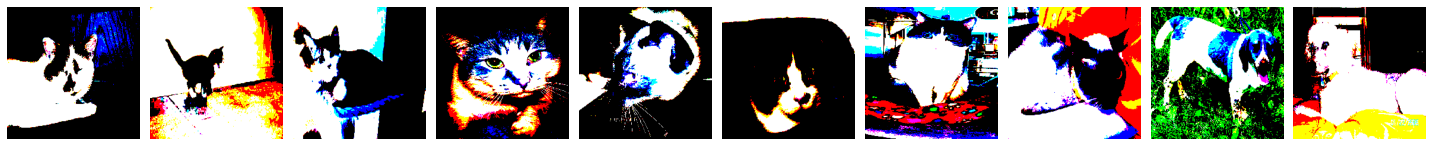

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [33]:
plotImages(imgs)
print(labels)

We have used the same preprocessing as VGG16. HOwever you can use your own preprocessing. for example
```
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()
```
then shuffle them
```
import random

random.shuffle(training_data)
```
and
```
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
```

Notice that the color appears to be distorted. This has to do with the VGG16 processing we applied to the data sets, which we'll talk about in an upcoming episode. 

Note that dogs are represented with the one-hot encoding of [0,1], and cats are represented by [1,0].

$$steps\_per\_epoch =\frac{the\ training\ set\ size}{the\ trainig\ batch\ size} $$
$$validation\_steps=\frac{the\ validation\ set\ size}{the\ validation\ batch\ size} $$

# Simple CNN

In [34]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 200704)            0         
                                                                 
 dense_3 (Dense)             (None, 2)                

In [36]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
hist=model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
100/100 - 6s - loss: 2.6171e-04 - accuracy: 1.0000 - val_loss: 3.1366 - val_accuracy: 0.6300 - 6s/epoch - 57ms/step
Epoch 2/10
100/100 - 9s - loss: 2.3338e-04 - accuracy: 1.0000 - val_loss: 3.1390 - val_accuracy: 0.6300 - 9s/epoch - 90ms/step
Epoch 3/10
100/100 - 5s - loss: 2.1134e-04 - accuracy: 1.0000 - val_loss: 3.1405 - val_accuracy: 0.6300 - 5s/epoch - 48ms/step
Epoch 4/10
100/100 - 5s - loss: 1.9451e-04 - accuracy: 1.0000 - val_loss: 3.1440 - val_accuracy: 0.6350 - 5s/epoch - 48ms/step
Epoch 5/10
100/100 - 5s - loss: 1.7834e-04 - accuracy: 1.0000 - val_loss: 3.1464 - val_accuracy: 0.6400 - 5s/epoch - 54ms/step
Epoch 6/10
100/100 - 5s - loss: 1.6568e-04 - accuracy: 1.0000 - val_loss: 3.1473 - val_accuracy: 0.6400 - 5s/epoch - 49ms/step
Epoch 7/10
100/100 - 5s - loss: 1.5478e-04 - accuracy: 1.0000 - val_loss: 3.1511 - val_accuracy: 0.6400 - 5s/epoch - 54ms/step
Epoch 8/10
100/100 - 5s - loss: 1.4536e-04 - accuracy: 1.0000 - val_loss: 3.1527 - val_accuracy: 0.6400 - 5s/ep

The model is overfitted on training data.

In [41]:
print("accuracy     = ",hist.history["accuracy"][-1])
print("val_accuracy = ", hist.history["val_accuracy"][-1])

accuracy     =  1.0
val_accuracy =  0.6399999856948853


In [42]:
test_imgs, test_labels = next(test_batches)

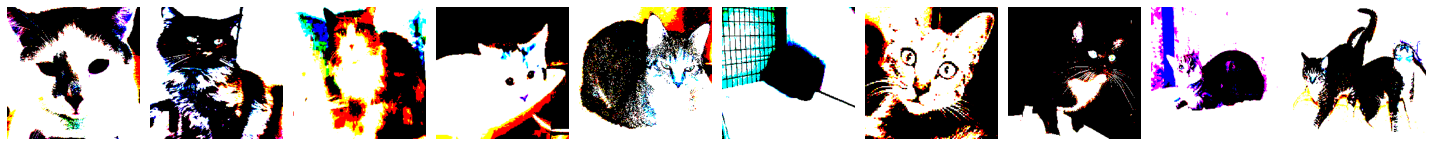

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [43]:
plotImages(test_imgs)
print(test_labels)

In [44]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
np.round(predictions)[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [45]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [46]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [48]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[34 16]
 [18 32]]


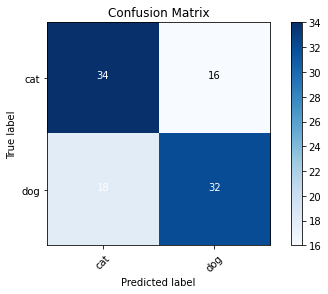

In [50]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1), target_names=["cat","dog"]))

              precision    recall  f1-score   support

         cat       0.65      0.68      0.67        50
         dog       0.67      0.64      0.65        50

    accuracy                           0.66       100
   macro avg       0.66      0.66      0.66       100
weighted avg       0.66      0.66      0.66       100



## Data Augmentation

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [54]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

see [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) documentation

In [56]:
gen = ImageDataGenerator(rotation_range=10,
                         width_shift_range=0.1, 
                         height_shift_range=0.1, 
                         shear_range=0.15, 
                         zoom_range=0.1, 
                         channel_shift_range=10., 
                         horizontal_flip=True)

In [66]:
chosen_image = random.choice(os.listdir(path+'train/dog'))
image_path = path+'train/dog/'+ chosen_image

plt.imread(image_path).shape

(331, 500, 3)

In [67]:
image = np.expand_dims(plt.imread(image_path),0)
image.shape

(1, 331, 500, 3)

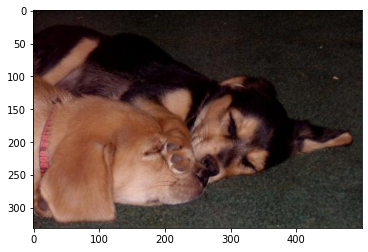

In [68]:
plt.imshow(image[0]);

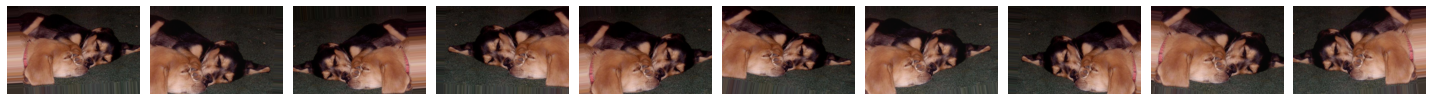

In [69]:
aug_iter = gen.flow(image)
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

plotImages(aug_images)

 Note, you can also use ```ImageDataGenerator.flow_from_directory()``` as opposed to ```ImageDataGenerator.flow()``` if you're wanting to generate batches of augmented data from data saved to an organized directory structure on disk. 

In [70]:
# save augmented images
aug_iter = gen.flow(image, save_to_dir=path+'train/dog', save_prefix='aug-image-', save_format='jpeg')


# use  Fine-Tuned VGG16 

VGG16, which is the model that won the 2014 ImageNet competition.

![ImageNet](https://image-net.org/static_files/index_files/logo.jpg)

[ImageNet](http://www.image-net.org/) is an image database.

In the ImageNet competition, multiple teams compete to build a model that best classifies images from the ImageNet library. The ImageNet library houses thousands of images belonging to 1000 different categories.

[VGG16 paper](https://arxiv.org/pdf/1409.1556.pdf):

"The only preprocessing we do is subtracting the mean RGB value, computed on the training set, from each pixel."


In [28]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [29]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [30]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Since we're only going to be classifying two categories, cats and dogs, we need to modify last layer.

In [31]:
type(vgg16_model)

keras.engine.functional.Functional

In [32]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [33]:
for layer in model.layers:
    layer.trainable = False

In [34]:
model.add(Dense(units=2, activation='softmax'))

In [35]:
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [36]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

Epoch 1/5
100/100 - 20s - loss: 0.3620 - accuracy: 0.8400 - val_loss: 0.1412 - val_accuracy: 0.9400 - 20s/epoch - 197ms/step
Epoch 2/5
100/100 - 8s - loss: 0.0903 - accuracy: 0.9660 - val_loss: 0.0889 - val_accuracy: 0.9700 - 8s/epoch - 82ms/step
Epoch 3/5
100/100 - 8s - loss: 0.0555 - accuracy: 0.9830 - val_loss: 0.0738 - val_accuracy: 0.9750 - 8s/epoch - 85ms/step
Epoch 4/5
100/100 - 9s - loss: 0.0381 - accuracy: 0.9900 - val_loss: 0.0666 - val_accuracy: 0.9800 - 9s/epoch - 86ms/step
Epoch 5/5
100/100 - 9s - loss: 0.0269 - accuracy: 0.9960 - val_loss: 0.0633 - val_accuracy: 0.9800 - 9s/epoch - 87ms/step


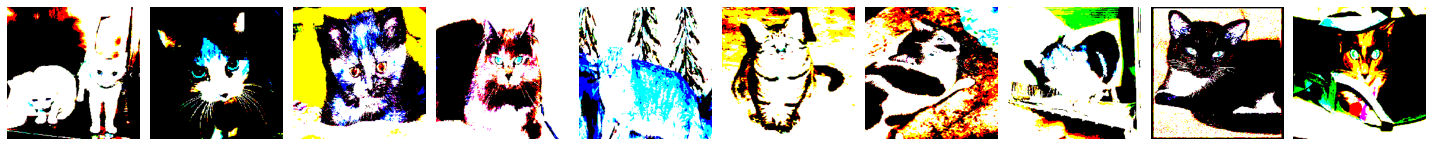

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [39]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [40]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

Confusion matrix, without normalization
[[49  1]
 [ 3 47]]


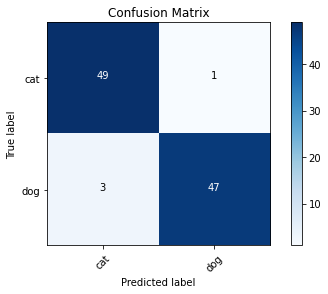

In [43]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# MobileNet Image Classification

To give a quick comparison in regards to size, the size of the full VGG16 network on disk is about 553 megabytes. The size of one of the currently largest MobileNets is about 17 megabytes, so that is a huge difference, especially when you think about deploying a model to a mobile app or running it in the browser.

[MobileNet paper](https://arxiv.org/pdf/1704.04861.pdf)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 0s 0us/step


In [4]:
def prepare_image(file, img_path="./"):
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

Download a test Image

In [12]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Igel.JPG/330px-Igel.JPG -O img1.jpg

--2022-07-21 09:39:02--  https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Igel.JPG/330px-Igel.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51190 (50K) [image/jpeg]
Saving to: ‘img1.jpg’

img1.jpg            100%[===================>]  49.99K  --.-KB/s    in 0.002s  

2022-07-21 09:39:03 (21.3 MB/s) - ‘img1.jpg’ saved [51190/51190]



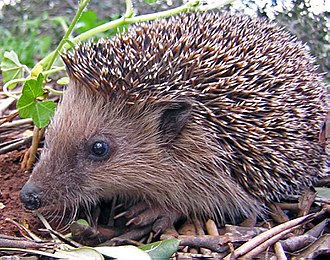

In [13]:
from IPython.display import Image
Image(filename='img1.jpg', width=300,height=200) 

In [16]:
preprocessed_image = prepare_image('img1.jpg')
predictions = mobile.predict(preprocessed_image)
predictions.shape

(1, 1000)

In [17]:
results = imagenet_utils.decode_predictions(predictions)
results

49152/35363 [=========================================] - 0s 0us/step


[[('n02346627', 'porcupine', 0.9990571),
  ('n02444819', 'otter', 0.00033662494),
  ('n02363005', 'beaver', 0.00031682273),
  ('n02441942', 'weasel', 0.00016027354),
  ('n01872401', 'echidna', 5.5046403e-05)]]

# sign language digits dataset
This data set is available as grayscale images on [Kaggle](https://kaggle.com/ardamavi/sign-language-digits-dataset) and is also available as RGB images on [Github](https://github.com/ardamavi/Sign-Language-Digits-Dataset). We'll be using the RGB data set.

In [18]:
!git clone https://github.com/ardamavi/Sign-Language-Digits-Dataset.git

Cloning into 'Sign-Language-Digits-Dataset'...
remote: Enumerating objects: 2095, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2095 (delta 2), reused 0 (delta 0), pack-reused 2089
Receiving objects: 100% (2095/2095), 15.07 MiB | 16.94 MiB/s, done.
Resolving deltas: 100% (660/660), done.


In [19]:
# Organize data into train, valid, test dirs
os.chdir('./Sign-Language-Digits-Dataset/Dataset')
if os.path.isdir('train/0/') is False: 
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

In [22]:
os.listdir('./Sign-Language-Digits-Dataset/Dataset')

['train', 'test', 'valid']

In [25]:
train_path = './Sign-Language-Digits-Dataset/Dataset/train'
valid_path = './Sign-Language-Digits-Dataset/Dataset/valid'
test_path = './Sign-Language-Digits-Dataset/Dataset/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [26]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [33]:
x = mobile.layers[-5].output
x = tf.keras.layers.Reshape(target_shape=(1024,))(x)
output = Dense(units=10, activation='softmax')(x)

# Model constructor 
model = Model(inputs=mobile.input, outputs=output)

In [34]:
for layer in model.layers[:-22]:
    layer.trainable = False

In [35]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [36]:
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [37]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=10,
            verbose=2
)

Epoch 1/10
172/172 - 11s - loss: 0.6211 - accuracy: 0.8172 - val_loss: 0.2834 - val_accuracy: 0.9100 - 11s/epoch - 61ms/step
Epoch 2/10
172/172 - 6s - loss: 0.1131 - accuracy: 0.9836 - val_loss: 0.1534 - val_accuracy: 0.9600 - 6s/epoch - 34ms/step
Epoch 3/10
172/172 - 6s - loss: 0.0506 - accuracy: 0.9965 - val_loss: 0.0872 - val_accuracy: 0.9833 - 6s/epoch - 33ms/step
Epoch 4/10
172/172 - 6s - loss: 0.0318 - accuracy: 0.9965 - val_loss: 0.0760 - val_accuracy: 0.9933 - 6s/epoch - 34ms/step
Epoch 5/10
172/172 - 6s - loss: 0.0177 - accuracy: 0.9994 - val_loss: 0.0656 - val_accuracy: 0.9933 - 6s/epoch - 33ms/step
Epoch 6/10
172/172 - 7s - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.0926 - val_accuracy: 0.9900 - 7s/epoch - 38ms/step
Epoch 7/10
172/172 - 6s - loss: 0.0117 - accuracy: 0.9994 - val_loss: 0.0691 - val_accuracy: 0.9933 - 6s/epoch - 33ms/step
Epoch 8/10
172/172 - 6s - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0782 - val_accuracy: 0.9800 - 6s/epoch - 33ms/step
Epoch 9/10
172

In [39]:
test_labels = test_batches.classes

In [38]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [40]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [42]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]


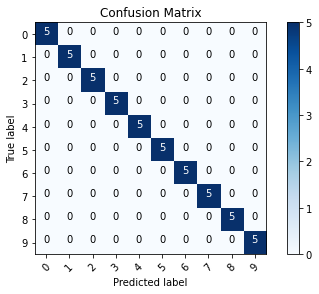

In [43]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# 

In [46]:
os.getcwd()

'/content'

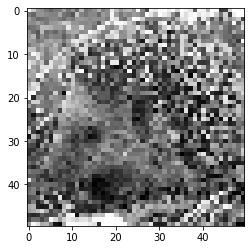

In [50]:
import os
import cv2

os.chdir("/content/")
IMG_SIZE = 50

img_array = cv2.imread("./img1.jpg" ,cv2.IMREAD_GRAYSCALE)
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

# Analyzing Models with TensorBoard

The way that we use TensorBoard with Keras is via a Keras callback. 
```
from tensorflow.keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir="logs/Cats-vs-dogs-CNN")

model.fit(X, y,
          batch_size=32,
          epochs=3,
          validation_split=0.3,
          callbacks=[tensorboard])
```
After training the model, you should have a new directory called logs.  

Open a console, change to your working directory, and type: ```tensorboard --logdir=logs/```. You should see a notice like: TensorBoard 1.10.0 at http://H-PC:6006 (Press CTRL+C to quit) where "h-pc" probably is whatever your machine's name is.


# Recurrent Neural Networks (RNN)

``some people made a neural network''

``a neural network made some people''

Obviously, these two sentences have widely varying impacts and meanings!

## Long Short Term Memory (LSTM) 

![RNN](./imgs/RNN0.jpg)
![RNN](./imgs/RNN1.jpg)

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

IF you are running with a GPU, try out the CuDNNLSTM layer type instead (don't pass an activation, tanh is required)

In [52]:
mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = x_train/255.0
x_test = x_test/255.0

print(x_train.shape)
print(x_train[0].shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(28, 28)


In [53]:
model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

n TensorFlow 2.0, the built-in LSTM and GRU layers have been updated to leverage CuDNN kernels by default when a GPU is available. 

Since the CuDNN kernel is built with certain assumptions, this means the layer will not be able to use the CuDNN kernel if you change the defaults of the built-in LSTM or GRU layers. E.g.:
* Changing the activation function from ```tanh``` to something else.
* Changing the recurrent_activation function from ```sigmoid``` to something else.
* Using ```recurrent_dropout > 0```.
* Setting unroll to True, which forces LSTM/GRU to decompose the inner tf.while_loop into an unrolled for loop.
Setting use_bias to False.
* Using masking when the input data is not strictly right padded (if the mask corresponds to strictly right padded data, CuDNN can still be used. This is the most common case).


**using ```CuDNNLST``` is really faster than ```LSTM```.**

In [54]:
# notice difference in importing with other layers
from tensorflow.compat.v1.keras.layers import CuDNNLSTM

In [56]:
model = Sequential()

# CuDNNLSTM only use tanh activation 
model.add(CuDNNLSTM(128, input_shape=(x_train.shape[1:]), return_sequences=True))
model.add(Dropout(0.2))

# CuDNNLSTM only use tanh activation 
model.add(CuDNNLSTM(128))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

In [ ]:
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

model.fit(x_train,
          y_train,
          epochs=3,
          validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/3
1875/1875 [==============================] - 17s 8ms/step - loss: 0.4148 - accuracy: 0.8713 - val_loss: 0.1227 - val_accuracy: 0.9623
Epoch 2/3
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1196 - accuracy: 0.9687 - val_loss: 0.0838 - val_accuracy: 0.9748
Epoch 3/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0840 - accuracy: 0.9781 - val_loss: 0.0735 - val_accuracy: 0.9786


# Summary

Keras API:
* Model
* Layer 
* Core Modules

![keras_api.bmp](./imgs/keras_api.bmp)

## Model
* Sequential Model
* Functional API

## Layers
* Dense
* Dropout
* Flatten
* Reshape
* Permute
* RepeatVector
* Lambda
* Conv1D
* Conv2D
* MaxPooling1D
* LocallyConnected1D
* subtract
* multiply
* maximum
* concatenate
* Embedding
* LSTM
* CuDDNLSTM
* GRU
* SimpleRNN
* Bidirectional

## Core Modules
* Initializers
* Regularizers
* Constraints
* Activations
* Losses
* Metrics
* Optimizers
* Callback
* Text processing
* Image processing
* Sequence processing
* Utilities
```
from keras.utils import to_categorical
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
to_categorical(labels)
```